# Image Segmentation:
Creating segments by grouping pixel values of an image using smart masks is known as Image Segmentation. It helps in reducing the complexity of the image to make further processing or analysis of the image simpler. There are two approaches in image segmentation; similarity and discontinuity. Similarity approach uses a threshold to detect the similarities between pixels to separate surfaces. Clustering uses this approach. Discontinuity approach detects discontinuity of pixel intensity values of the image. Line, point and edge detection techniques use this approach.  
In this project we will use K-means, Contour detection and Thresholding methods to segment images.

### Segmentation using K-Means Clustering:
K-means clustering is an unsupervised learning method where similar pixels are assigned to the same clusters. The essence of k-means is, we form cluster centers first (in this case three cluster centers), then, as we obtain new pixel values from the image, they are assigned to either one of the clusters based on how close their intensity value is to the center of clusters. We update the centroids of the clusters and continue this process until all pixels are exhausted.  In the following, we group pixels in the images into three clusters (k=3).   

In [1]:
#Image Segmentation using K-means

##Importing libraries and Images

import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
path1 = 'spiral.jpg'
path2 = 'butterfly.jpg'
img1 = cv2.imread(path1)
img2 = cv2.imread(path2)
images=[img1, img2]

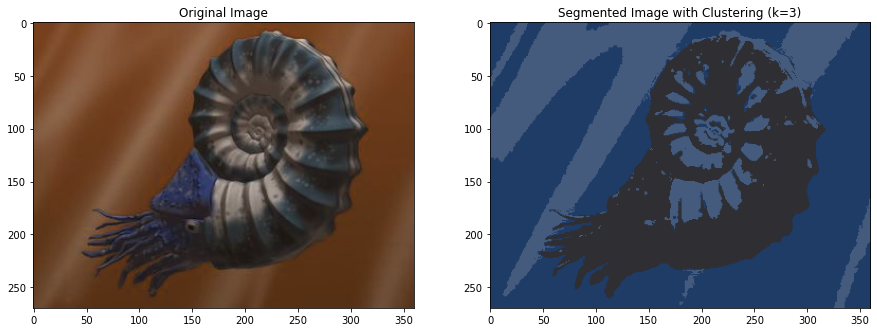

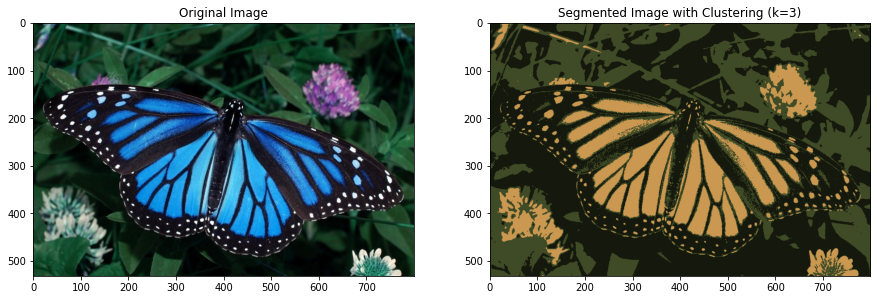

In [3]:
for i in images:
    ##Preprocessing the Image
    img = cv2.cvtColor(i,cv2.COLOR_BGR2RGB)
    twoDimage = img.reshape((-1,3))
    twoDimage = np.float32(twoDimage)

    ##Defining Parameters
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 3
    attempts=10

    ##Apply K-Means
    ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    result_image = res.reshape((img.shape))
    fig, ax = plt.subplots(1,2, figsize=(15,10))
    ax=ax.ravel()
    ax[0].imshow(i)
    ax[0].set_title("Original Image")
    ax[1].imshow(result_image)
    ax[1].set_title("Segmented Image with Clustering (k=3)")
    plt.show()
    

### Analysis:
We see that, in both cases, the variety of colors in the original images are restricted to three colors in the segmented images, as we grouped them into three clusters. If we had more clusters, the segmented images would be closer to the original images, as more variety of colors would be introduced.

### Segmentation using Contour Detection:
Image segmentation using contour detection can be achieved in several steps:
- Find the average pixel values and use this as the threshold to be used by Canny edge detection.
- Apply dilation to the edges found by Canny edge detection.
- Create contours of the detected edges.
- Create an empty mask and draw the contours.
- Apply this mask on the original image to black out irrelevant parts.

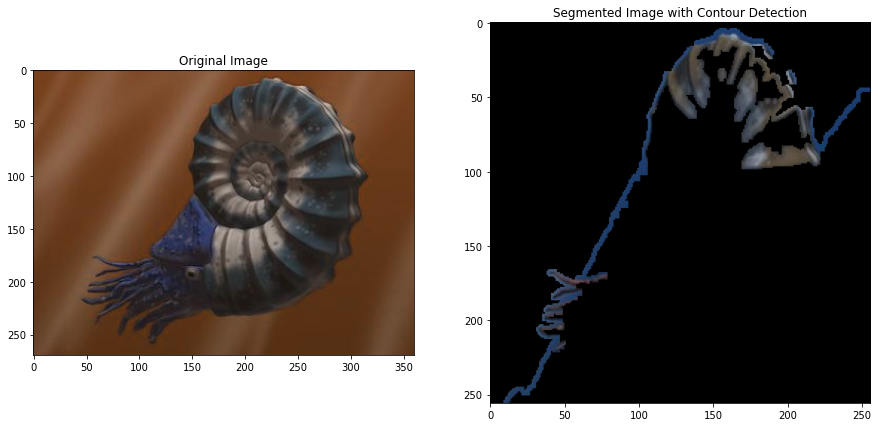

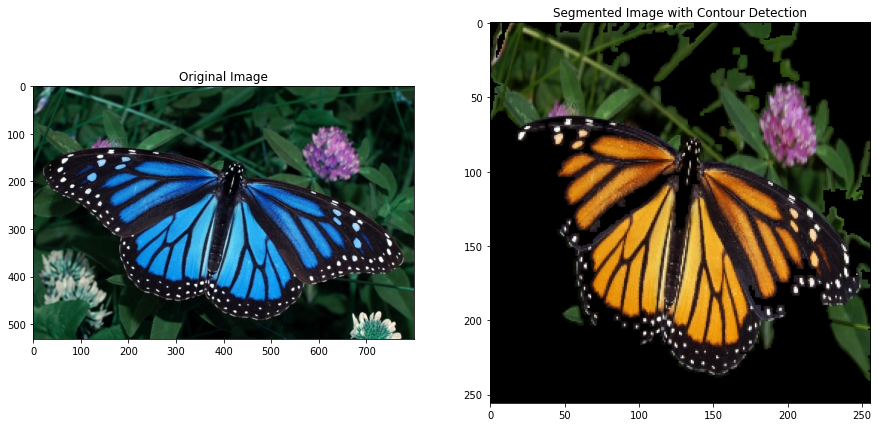

In [4]:
for i in images:
    #Image Segmentation using Contour Detection
    img = cv2.resize(i,(256,256))

    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    _,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)
    edges = cv2.dilate(cv2.Canny(thresh,0,255),None)

    ##Detecting and Drawing Contours

    cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
    mask = np.zeros((256,256), np.uint8)
    masked = cv2.drawContours(mask, [cnt],-1, 255, -1)

    ##Segmenting the Regions

    dst = cv2.bitwise_and(img, img, mask=mask)
    segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(1,2, figsize=(15,10))
    ax=ax.ravel()
    ax[0].imshow(i)
    ax[0].set_title("Original Image")
    ax[1].imshow(segmented)
    ax[1].set_title("Segmented Image with Contour Detection")
    plt.show()
    

### Analysis:
With this technique, since we are applying a threshold and a mask, we lose many details of the image. In the sea creature image, we see that the whole background is omitted. That's because the background's intensity values look pretty uniformly distributed and probably were under the threshold value. In the second image, we have much more variety in the pixel intensities. Therefore, we were able to retain more details of the image. If the task at hand is to detect the object in the forefront and the background is fairly uniformly distributed, this technique could produce nice results. However, if the background is as busy as the object itself, we may want to try another method.

### Segmentation using Thresholding:
In this method, we find the threshold using Otsu method. Apply this threshold to grayscaled image to create a mask. Finally, apply this mask to all channels of the original image.

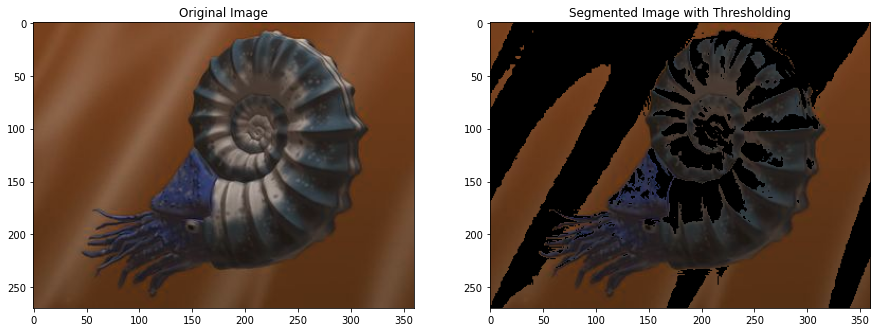

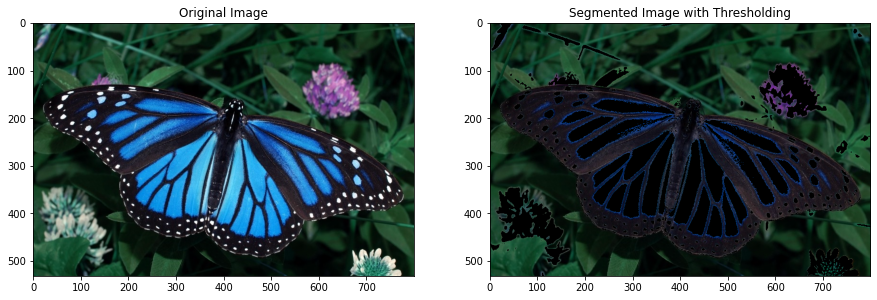

In [5]:
#Image Segmentation using Thresholding
from skimage.filters import threshold_otsu
for i in images:
    ##Preprocessing the Image
    img_rgb=cv2.cvtColor(i,cv2.COLOR_BGR2RGB)
    img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)

    ##Segmentation Process
    def filter_image(image, mask):
        r = image[:,:,0] * mask
        g = image[:,:,1] * mask
        b = image[:,:,2] * mask
        return np.dstack([r,g,b])

    thresh = threshold_otsu(img_gray)
    img_otsu  = img_gray < thresh
    filtered = filter_image(i, img_otsu)
    fig, ax = plt.subplots(1,2, figsize=(15,10))
    ax=ax.ravel()
    ax[0].imshow(i)
    ax[0].set_title("Original Image")
    ax[1].imshow(filtered)
    ax[1].set_title("Segmented Image with Thresholding")
    plt.show()
    

### Analysis:
Otsu threshold separates high and low intensity valued pixels. Therefore, as expected, high intensity pixels have been turned off in the resulting images. If the task requires us to segment high intensity pixels this would be a great choice. 

### Image segmentation using Color Masking:
In color masking we restrict the distribution of colors to a certain range. Only pixels whose color values falling in that range are displayed.

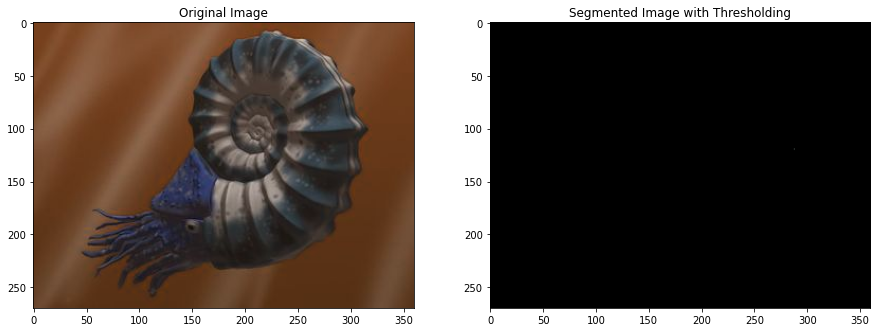

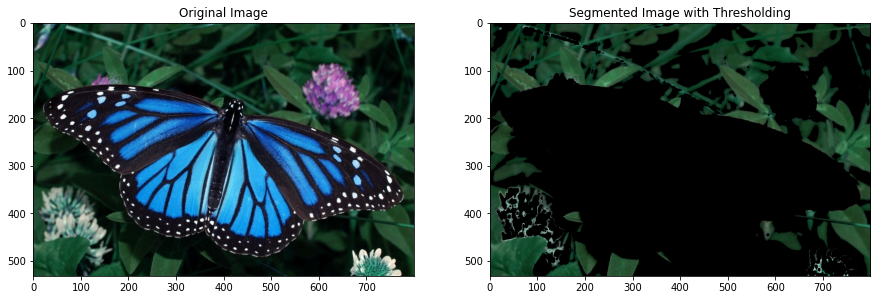

In [6]:
#Segmentation using Color Masking
## Preprocessing the Image
for i in images:
    rgb_img = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)

    ##Define the Color Range to be Detected
    #light_blue = (90, 70, 50)
    #dark_blue = (128, 255, 255)
    # You can use the following values for green
    light_green = (40, 40, 40)
    dark_green = (70, 255, 255)
    mask = cv2.inRange(hsv_img, light_green, dark_green)

    ##Apply the Mask
    result = cv2.bitwise_and(i, i, mask=mask)
    fig, ax = plt.subplots(1,2, figsize=(15,10))
    ax=ax.ravel()
    ax[0].imshow(i)
    ax[0].set_title("Original Image")
    ax[1].imshow(result)
    ax[1].set_title("Segmented Image with Thresholding")
    plt.show()


### Analysis:
The color mask used in the example allows only pixels with shades of green to be shown. In the first image we don't have any green color, so the whole image is blacked out. In the second image, the background is mostly green, so we segmented only this part. This method could be great if the task is to single out surfaces with similar colors.

Reference:

- https://en.wikipedia.org/wiki/File:Monarch_In_May.jpg
- https://en.wikipedia.org/wiki/User:The0Quester/Gallery/Animals#/media/File:Asteroceras_BW.jpg
